<a href="https://colab.research.google.com/github/Minahil-official/Quater-2/blob/main/first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import userdata
gemini_api_key= userdata.get('GOOGLE_API_KEY_2')

In [2]:
!pip install langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.2 MB/s eta 0:00:00


In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate


In [4]:
initial_prompt = PromptTemplate(
    input_variables = ["question"],
    template = "change the {question} to a image generation prompt"
)
second_promt = PromptTemplate(
    input_variables = ["initial_response"],
    template = "read this {first_response} and summarize this into 2 lines for best image genaration!"
)


In [5]:
llm = ChatGoogleGenerativeAI(
    api_key = gemini_api_key,
    model = "gemini-2.0-flash-exp",
    temperature = 0.5
)

In [6]:
first_chain = initial_prompt | llm
second_chain = second_promt | llm


In [7]:
from diffusers import StableDiffusionPipeline
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [12]:
first_response = first_chain.invoke({"question" : input("type anything : ")})
print("first_chain " , first_response)

second_response = second_chain.invoke({"first_response" : first_response})
print("second_chain " , second_response)

# Pass the refined prompt to the Stable Diffusion pipeline
print("\nGenerating the image ...")

# Load the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

# Use GPU if available
if torch.cuda.is_available():
    pipe.to("cuda")

# Generate the image using the refined prompt
image = pipe(first_response.content).images[0]


# Save the generated image
image.save("refined_generated_image.png")
print("Image generated and saved as 'refined_generated_image.png'")

type anything : AI agent
first_chain  content='Okay, I understand. You want me to act as an image generation prompt, instead of a conversational AI agent. \n\n**From now on, when you give me a description, I will try my best to translate it into a prompt suitable for an image generation AI.**\n\n**Here\'s how I\'ll approach it:**\n\n*   **Focus on Key Elements:** I\'ll identify the main subjects, objects, and settings in your description.\n*   **Add Descriptive Details:** I\'ll include details about colors, textures, lighting, style, and mood to make the prompt more vivid.\n*   **Consider Composition:** I\'ll think about how the elements are arranged in the image (e.g., close-up, wide shot, perspective).\n*   **Use Keywords:** I\'ll use common image generation keywords to guide the AI (e.g., "photorealistic," "painting," "digital art," "cinematic").\n*   **Be Specific (When Needed):** If you have specific requests for art styles or artists, I\'ll try to incorporate them.\n\n**How to us

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (423 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['identify the main subjects , objects , and settings in your description . * ** add descriptive details :** i \'ll include details about colors , textures , lighting , style , and mood to make the prompt more vivid . * ** consider composition :** i \'ll think about how the elements are arranged in the image ( e . g ., close - up , wide shot , perspective ). * ** use keywords :** i \'ll use common image generation keywords to guide the ai ( e . g ., " photorealistic ," " painting ," " digital art ," " cinematic "). * ** be specific ( when needed ):** if you have specific requests for art styles or artists , i \'ll try to incorporate them . ** how to use me :** 1 . ** give me a description of the image you w

  0%|          | 0/50 [00:00<?, ?it/s]

Image generated and saved as 'refined_generated_image.png'


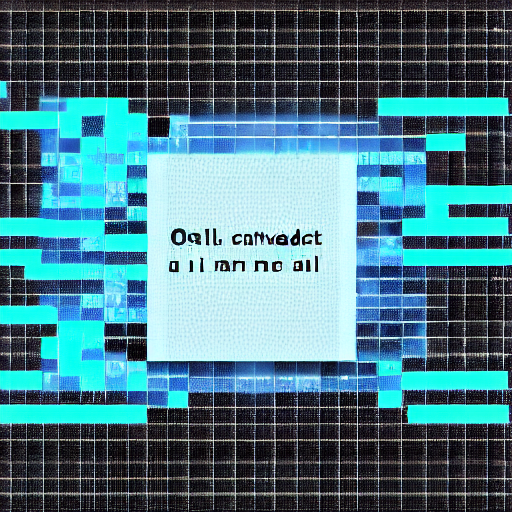

In [13]:
image